<a href="https://colab.research.google.com/github/GuojunWu/guojun/blob/master/Cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

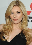

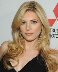

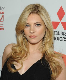

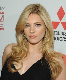

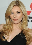

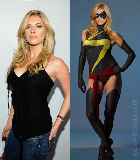

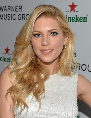

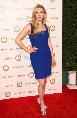

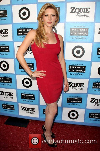

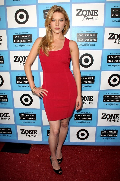

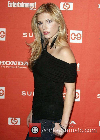

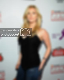

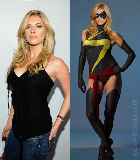

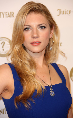

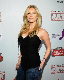

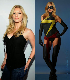

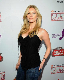

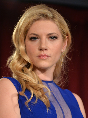

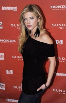

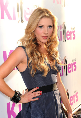

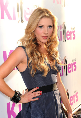

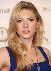

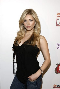

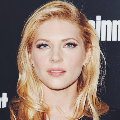

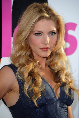

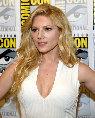

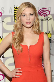

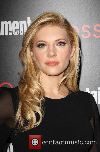

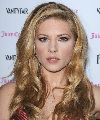

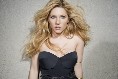

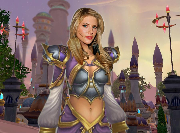

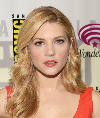

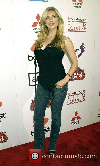

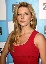

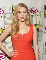

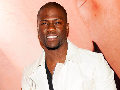

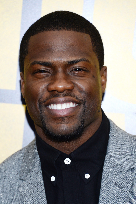

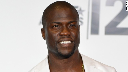

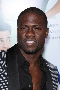

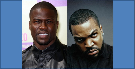

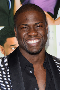

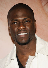

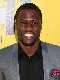

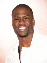

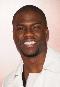

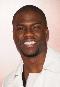

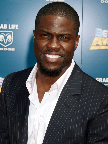

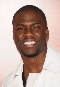

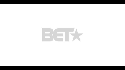

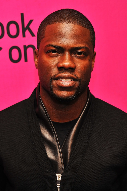

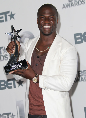

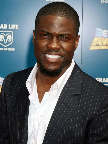

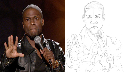

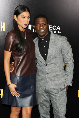

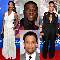

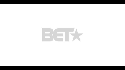

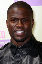

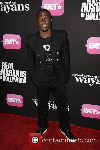

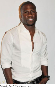

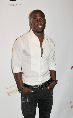

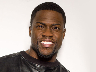

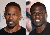

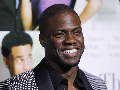

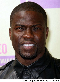

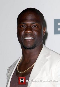

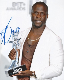

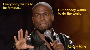

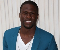

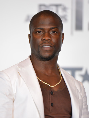

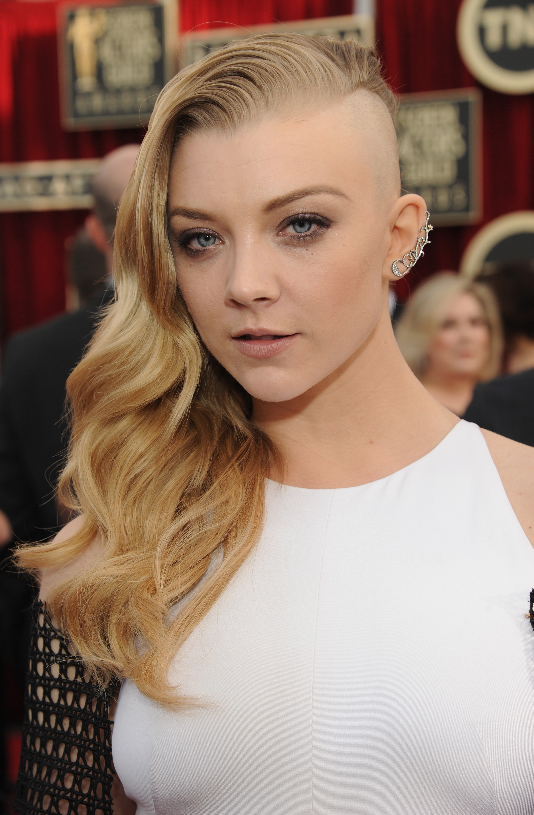

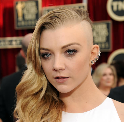

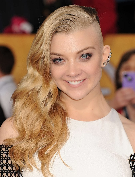

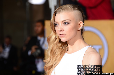

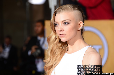

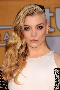

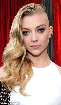

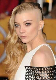

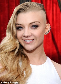

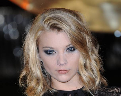

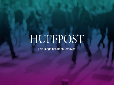

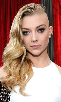

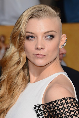

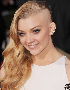

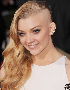

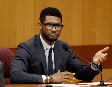

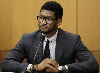

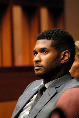

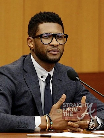

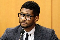

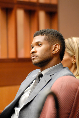

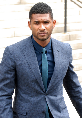

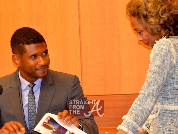

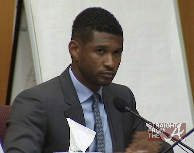

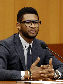

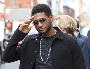

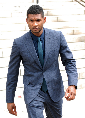

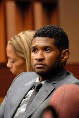

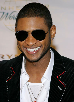

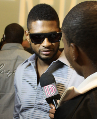

In [12]:
import os
import cv2
import tarfile
import numpy as np
from urllib import request
from google.colab import drive
from google.colab.patches import cv2_imshow


base_path = "/content/sample_data/CV__Group_assignment"

if not os.path.isdir(base_path):
  os.makedirs(base_path)

vgg_face_dataset_url = "http://www.robots.ox.ac.uk/~vgg/data/vgg_face/vgg_face_dataset.tar.gz"

with request.urlopen(vgg_face_dataset_url) as r, open(os.path.join(base_path, "vgg_face_dataset.tar.gz"), 'wb') as f:
  f.write(r.read())

with tarfile.open(os.path.join(base_path, "vgg_face_dataset.tar.gz")) as f:
  f.extractall(os.path.join(base_path))

trained_haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

with request.urlopen(trained_haarcascade_url) as r, open(os.path.join(base_path, "haarcascade_frontalface_default.xml"), 'wb') as f:
    f.write(r.read())


celebs = [ "Katheryn_Winnick.txt", "Kevin_Hart.txt", "Natalie_Dormer.txt", "Usher_Raymond.txt"]
all_subjects = [subject for subject in sorted(os.listdir(os.path.join(base_path, "vgg_face_dataset", "files"))) if subject.startswith(tuple(celebs)) and subject.endswith(".txt")]

# from celebs, person A - B - C - D
nb_subjects = 4
nb_images_per_subject = 35
nb_images_per_subject_train = 15

images = []
for subject in all_subjects[:nb_subjects]:

  with open(os.path.join(base_path, "vgg_face_dataset", "files", subject), 'r') as f:
    lines = f.readlines()

  images_ = []
  for line in lines:
    url = line[line.find("http://"): line.find(".jpg") + 4]

    try:
      res = request.urlopen(url)
      img = np.asarray(bytearray(res.read()), dtype="uint8")
      img = cv2.imdecode(img, cv2.IMREAD_COLOR)
      h, w = img.shape[:2]
      images_.append(img)
      cv2_imshow(cv2.resize(img, (w // 5, h // 5)))

    except:
      pass
    
    # Retrieve only 15 images for test data (some margin for invalid images) to reduce load
    if len(images_) == nb_images_per_subject_train and subject in ["Natalie_Dormer.txt", "Usher_Raymond.txt"]:
      images.append(images_)
      break

    if len(images_) == nb_images_per_subject:
      images.append(images_)
      break

# Manual preprocessing to remove look alike images
kat_prep = [0, 1, 2, 4, 9, 11, 12, 14, 15, 16, 20, 21,]
for index in sorted(kat_prep, reverse=True):
    del images[0][index]

del images[3][10:12]


Found 1 face(s)!
Face found, saving...


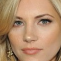

Found 1 face(s)!
Face found, saving...


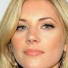

Found 1 face(s)!
Face found, saving...


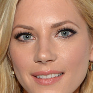

Found 1 face(s)!
Face found, saving...


Found 1 face(s)!
Face found, saving...


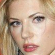

Found 1 face(s)!
Face found, saving...


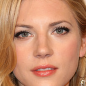

Found 1 face(s)!
Face found, saving...


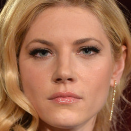

Found 1 face(s)!
Face found, saving...


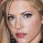

Found 1 face(s)!
Face found, saving...


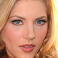

Found 1 face(s)!
Face found, saving...


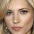

Found 1 face(s)!
Face found, saving...


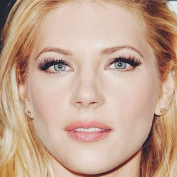

Found 1 face(s)!
Face found, saving...


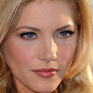

Found 1 face(s)!
Face found, saving...


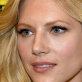

Found 1 face(s)!
Face found, saving...


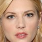

Found 1 face(s)!
Face found, saving...


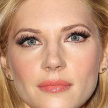

Found 1 face(s)!
Face found, saving...


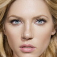

Found 1 face(s)!
Face found, saving...


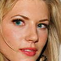

Found 1 face(s)!
Face found, saving...


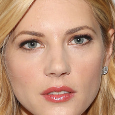

Found 1 face(s)!
Face found, saving...


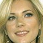

Found 1 face(s)!
Face found, saving...


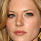

Found 1 face(s)!
Face found, saving...


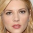

Found 1 face(s)!
Face found, saving...


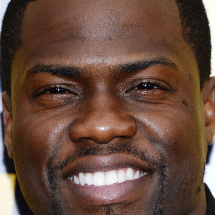

Found 1 face(s)!
Face found, saving...


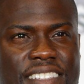

Found 1 face(s)!
Face found, saving...


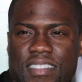

Found 1 face(s)!
Face found, saving...


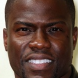

Found 1 face(s)!
Face found, saving...


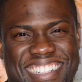

Found 1 face(s)!
Face found, saving...


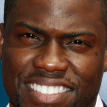

Found 1 face(s)!
Face found, saving...


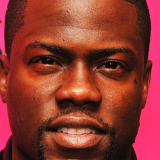

Found 1 face(s)!
Face found, saving...


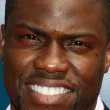

Found 1 face(s)!
Face found, saving...


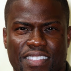

Found 1 face(s)!
Face found, saving...


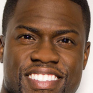

Found 1 face(s)!
Face found, saving...


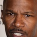

Found 1 face(s)!
Face found, saving...


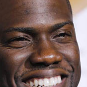

Found 1 face(s)!
Face found, saving...


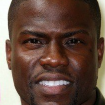

Found 1 face(s)!
Face found, saving...


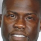

Found 1 face(s)!
Face found, saving...


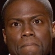

Found 1 face(s)!
Face found, saving...


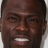

Found 1 face(s)!
Face found, saving...


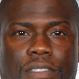

Found 1 face(s)!
Face found, saving...


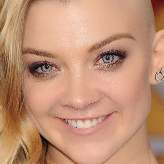

Found 1 face(s)!
Face found, saving...


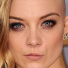

Found 1 face(s)!
Face found, saving...


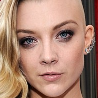

Found 1 face(s)!
Face found, saving...


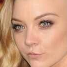

Found 1 face(s)!
Face found, saving...


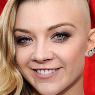

Found 1 face(s)!
Face found, saving...


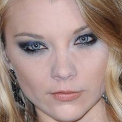

Found 1 face(s)!
Face found, saving...


Found 1 face(s)!
Face found, saving...


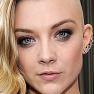

Found 1 face(s)!
Face found, saving...


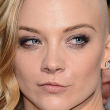

Found 1 face(s)!
Face found, saving...


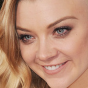

Found 1 face(s)!
Face found, saving...


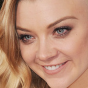

Found 1 face(s)!
Face found, saving...


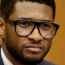

Found 1 face(s)!
Face found, saving...


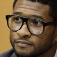

Found 1 face(s)!
Face found, saving...


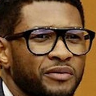

Found 1 face(s)!
Face found, saving...


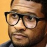

Found 1 face(s)!
Face found, saving...


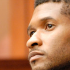

Found 1 face(s)!
Face found, saving...


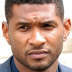

Found 1 face(s)!
Face found, saving...


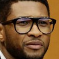

Found 1 face(s)!
Face found, saving...


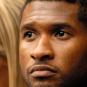

Found 1 face(s)!
Face found, saving...


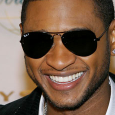

In [13]:
faceCascade = cv2.CascadeClassifier(os.path.join(base_path, "haarcascade_frontalface_default.xml"))

for idx, images_ in enumerate(images):
  for id, img in enumerate(images_):

    img_ = img.copy()
    img_gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
        img_gray,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
    # Only take into account one face 
    if len(faces) != 1:
      continue

    print("Found {} face(s)!".format(len(faces)))

    for (x, y, w, h) in faces:
        cv2.rectangle(img_, (x, y), (x+w, y+h), (0, 255, 0), 10)

        # Clips only the face in the image
        face_extraction = img[y:y+h, x:x+w]
        
        #Will delete this code after receiving a reply from the TA
        #Depending on if it is allowed to store the images or not, else load into a local array
        file_name = str(celebs[idx]) + str(id) + str(w) + str(h) + '.jpg'
        print('Face found, saving...')
        cv2.imwrite(os.path.join(base_path + "/data", file_name), face_extraction)
        
        cv2_imshow(cv2.resize(face_extraction, (w // 2, h // 2)))

    # Uncomment to see the original picture with a square around the face
    #h, w = img_.shape[:2]
    #cv2_imshow(cv2.resize(img_, (w // 5, h // 5)))

IndexError: ignored

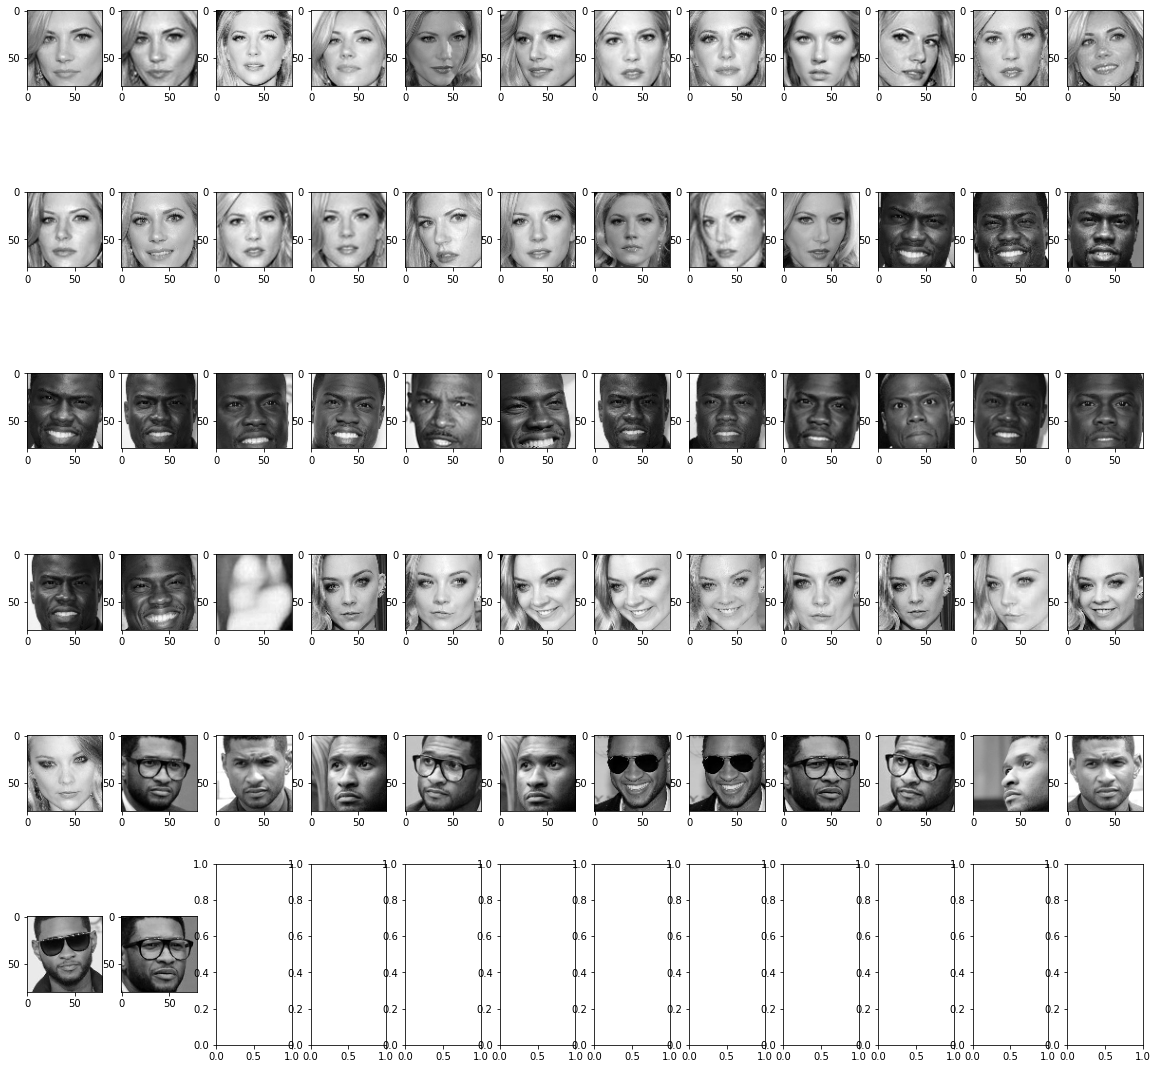

In [14]:
import glob
import numpy as np
import matplotlib.pyplot as plt

filenames = glob.glob(base_path + "/data/*.jpg")
filenames.sort()

# List of images under CV__Group_assignment/data, contains the faces of the celebrities
faces = [cv2.imread(img, cv2.IMREAD_GRAYSCALE) for img in filenames]
faces = [cv2.resize(img, (80, 80), interpolation=cv2.INTER_CUBIC) for img in faces]

sz = faces[0].shape
data = np.zeros((len(faces), sz[0] * sz[1]), dtype=np.uint8)
for i in range(len(faces)):
    data[i, :] = faces[i].flatten()
f, axs = plt.subplots(6,12, figsize=(20,20))
plt.subplots_adjust(hspace=0.00, wspace=0.25)

for i in range(6):
    for j in range(12):
        axs[i,j].imshow(faces[i*12+j], cmap=plt.cm.gray)

# Unsupervised learning: PCA

1. Convert my image (you can work in color if you like) dataset to a 2D matrix: 

2. Can you exploit the dimensionality of this data matrix to make your computations more effective? (Don't undrestand)


In [0]:
pca_dataset = np.asarray(faces).reshape(len(faces),-1)
# Person A: Training set 20 images with 6400 dimensions
a_train = pca_dataset[:20,:]
a_train.shape

# Person C: Index 39 - 48 (10 images)
c_test = pca_dataset[39:49,:]


3. Mean substraction or not: must have
 
 Source: https://stats.stackexchange.com/questions/189822/how-does-centering-make-a-difference-in-pca-for-svd-and-eigen-decomposition

In [0]:
# mean corrected by subtracting the mean (along columns)
a_norm = (a_train-np.mean(a_train,axis=0)).T
a_norm.shape
c_norm = (c_test-np.mean(a_train,axis=0)).T # test set minus trainset mean

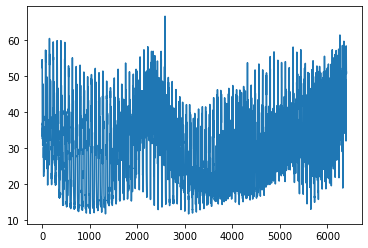

In [62]:
plt.plot(np.std(a_norm,axis=1)) # standardize or not

In [63]:
# Covariance matrix
a_cov = np.cov(a_norm)
a_cov.shape

(6400, 6400)

4. In practice use eigenvalue decomposition, but singular value decomposition makes much better sense numerically.
  
  Source: https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

  https://math.stackexchange.com/questions/3869/what-is-the-intuitive-relationship-between-svd-and-pca
  
  Tutorial: https://arxiv.org/pdf/1404.1100.pdf

In [0]:
# computing eigenvalues and eigenvectors of covariance matrix
[envals,envecs] = np.linalg.eig(a_cov)

In [0]:
# sorting the eigenvalues and eigenvectors in descending order
idx = np.argsort(-envals) 
envals = envals[idx]
envecs = envecs[:,idx]

In [0]:
# taking only the top n_components 50
e_vals = envals[:50]
e_vecs = envecs[:,range(50)].real

Reconstructing original image

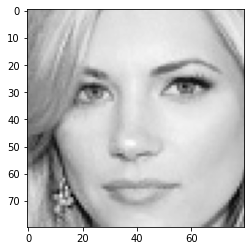

In [151]:
# projection of the data in the new space
proj = np.dot(e_vecs.T,a_norm)
# Reconstructing original images from the projection
a_r = np.dot(e_vecs,proj).T + np.mean(a_train,axis=0)
# Calculate loss
np.linalg.norm(a_train-a_r)
# Visualize one face
oneimage = a_r[0,:].reshape(80,-1)
plt.imshow(oneimage,cmap='Greys_r')


5. Visualize the reconstruction of one face using gradually more eigenfaces

Text(0.5, 1.0, 'Original')

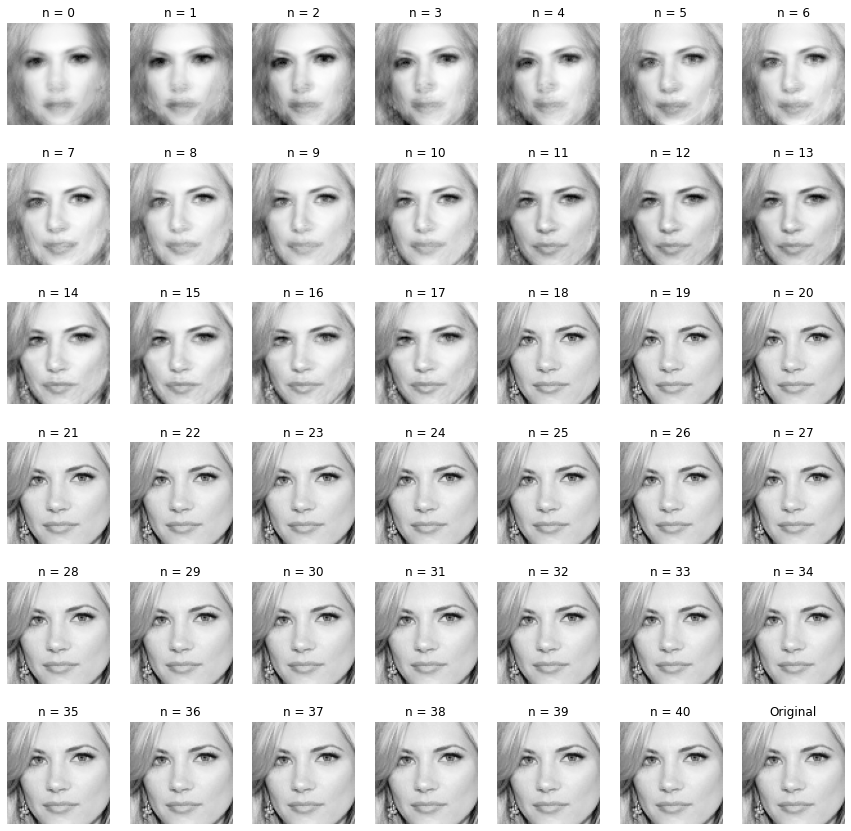

In [159]:

max_components = 40
step = 1
i = 1
n_columns = 7
n_images = max_components/step/n_columns + 1

fig = plt.figure(figsize=(15, 15))



for n in range(0,max_components+step,step):
    e_vals = envals[:n]
    e_vecs = envecs[:,range(n)].real
    proj = np.dot(e_vecs.T,a_norm)

    a_r = np.dot(e_vecs,proj).T + np.mean(a_train,axis=0)
    oneimage = a_r[0,:].reshape(80,-1)
  
    
    fig.add_subplot(n_images, n_columns, i)

    plt.imshow(oneimage,cmap='Greys_r')
    plt.axis('off')
    plt.title("n = %d" % n)
    i += 1
fig.add_subplot(n_images, n_columns, i)
plt.imshow(a_train[0,:].reshape(80,-1), cmap='Greys_r')
plt.axis('off')
plt.title("Original")  

6. Choose the optimal number p of principal components

In [0]:
dist = []
max_components = 22
step = 1
for n in range(0,max_components+step,step):
    e_vals = envals[:n]
    e_vecs = envecs[:,range(n)].real
    proj = np.dot(e_vecs.T,a_norm)

    a_r = np.dot(e_vecs,proj).T + np.mean(a_train,axis=0)
    dist.append(np.linalg.norm(a_train-a_r)/20)



/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Number of Principal Components')

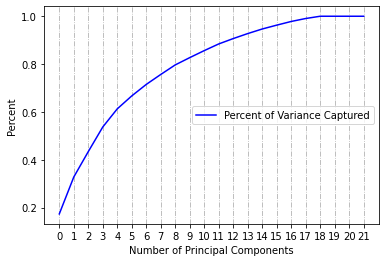

In [189]:
# Percent of original variance accounted for
percent = np.cumsum(e_vals)/sum(envals)

plt.plot(range(len(percent)),percent,'b', label="Percent of Variance Captured")
plt.legend(loc="center right")
plt.xticks(np.arange(0,max_components,1))
plt.grid(axis='x',linestyle='-.')
plt.ylabel("Percent")
plt.xlabel("Number of Principal Components")

Text(0.5, 0, 'Number of Principal Components')

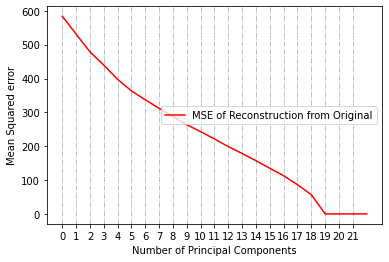

In [190]:
# MSE between the original and the rescontruction
dist = dist
plt.plot(range(0,max_components+step,step),dist,'r', label="MSE of Reconstruction from Original")
plt.legend(loc="center right")
plt.xticks(np.arange(0,max_components,1))
plt.grid(axis='x',linestyle='-.')
plt.ylabel("Mean Squared error")
plt.xlabel("Number of Principal Components")

Choose 18 or 19?

7. Reflect on the design choices that you made and how this might influence the performance of the features you have learned.
8. Did you need special pre-processing to make this work

9. Visualize the faces in the principal component space

  （Does it mean visualize eigen faces?)

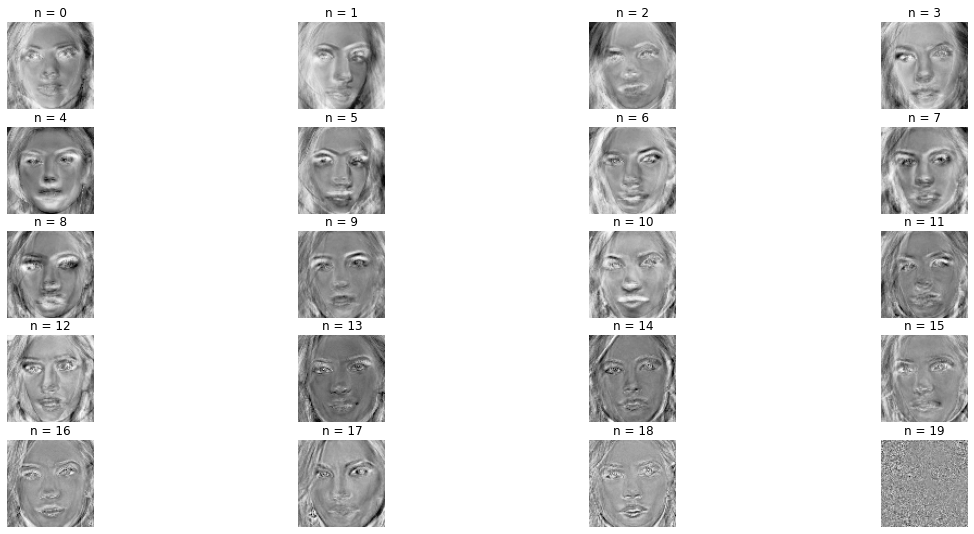

In [210]:
e_vecs = envecs[:,range(20)].real
e_vecs.shape
fig = plt.figure(figsize=(20, 40))
for n in range(0,20):
  e_faces = e_vecs[:,n].reshape(80,-1)

  fig.add_subplot(21, 4, n+1)
  plt.imshow(e_faces,cmap='Greys_r')
  plt.axis('off')
  plt.title("n = %d" % n)
    

  

Choose 18 components

10. Project the test images onto the same p-components

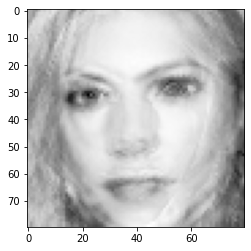

In [223]:
e_vecs = envecs[:,range(19)].real
# projection of the data in the new space
proj = np.dot(e_vecs.T,c_norm)
# Reconstructing original images from the projection
c_r = np.dot(e_vecs,proj).T + np.mean(a_train,axis=0)
# Calculate loss
np.linalg.norm(c_test-c_r)
# Visualize one face
oneimage = c_r[0,:].reshape(80,-1)
plt.imshow(oneimage,cmap='Greys_r')


